## Project #1
##### By Chintan Shah, Sajal Vasal and Sunil Madkar

## Dataset Information
This data set measures the running time of a matrix-matrix product A*B = C, where all matrices have size 2048 x 2048, using a parameterizable SGEMM GPU kernel with 241600 possible parameter combinations. For each tested combination, 4 runs were performed and their results are reported as the 4 last columns. All times are measured in milliseconds*.

There are 14 parameter, the first 10 are ordinal and can only take up to 4 different powers of two values, and the 4 last variables are binary. Out of 1327104 total parameter combinations, only 241600 are feasible (due to various kernel constraints). This data set contains the results for all these feasible combinations.

The experiment was run on a desktop workstation running Ubuntu 16.04 Linux with an Intel Core i5 (3.5GHz), 16GB RAM, and a NVidia Geforce GTX 680 4GB GF580 GTX-1.5GB GPU. We use the 'gemm_fast' kernel from the automatic OpenCL kernel tuning library 'CLTune' ([Web Link]).

### Objective
Implement regression model on the dataset to predict the GPU run time. 
Use the average of four runs as the target variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('sgemm_product.csv') #Reading the data
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [3]:
df['Runtime']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1) 
#Creating new column with arithmetic mean of other 4 columns mentioned 

In [4]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [5]:
df1=df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 15 columns):
MWG        241600 non-null int64
NWG        241600 non-null int64
KWG        241600 non-null int64
MDIMC      241600 non-null int64
NDIMC      241600 non-null int64
MDIMA      241600 non-null int64
NDIMB      241600 non-null int64
KWI        241600 non-null int64
VWM        241600 non-null int64
VWN        241600 non-null int64
STRM       241600 non-null int64
STRN       241600 non-null int64
SA         241600 non-null int64
SB         241600 non-null int64
Runtime    241600 non-null float64
dtypes: float64(1), int64(14)
memory usage: 27.6 MB


In [6]:
df1.isnull().sum() #No null values

MWG        0
NWG        0
KWG        0
MDIMC      0
NDIMC      0
MDIMA      0
NDIMB      0
KWI        0
VWM        0
VWN        0
STRM       0
STRN       0
SA         0
SB         0
Runtime    0
dtype: int64

In [7]:
#checking descriptive stats
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
NWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
KWG,241600.0,25.513113,7.855619,16.0000,16.0000,32.00,32.0000,32.0000
MDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
NDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
MDIMA,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
NDIMB,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
KWI,241600.0,5.000000,3.000006,2.0000,2.0000,5.00,8.0000,8.0000
VWM,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000
VWN,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000


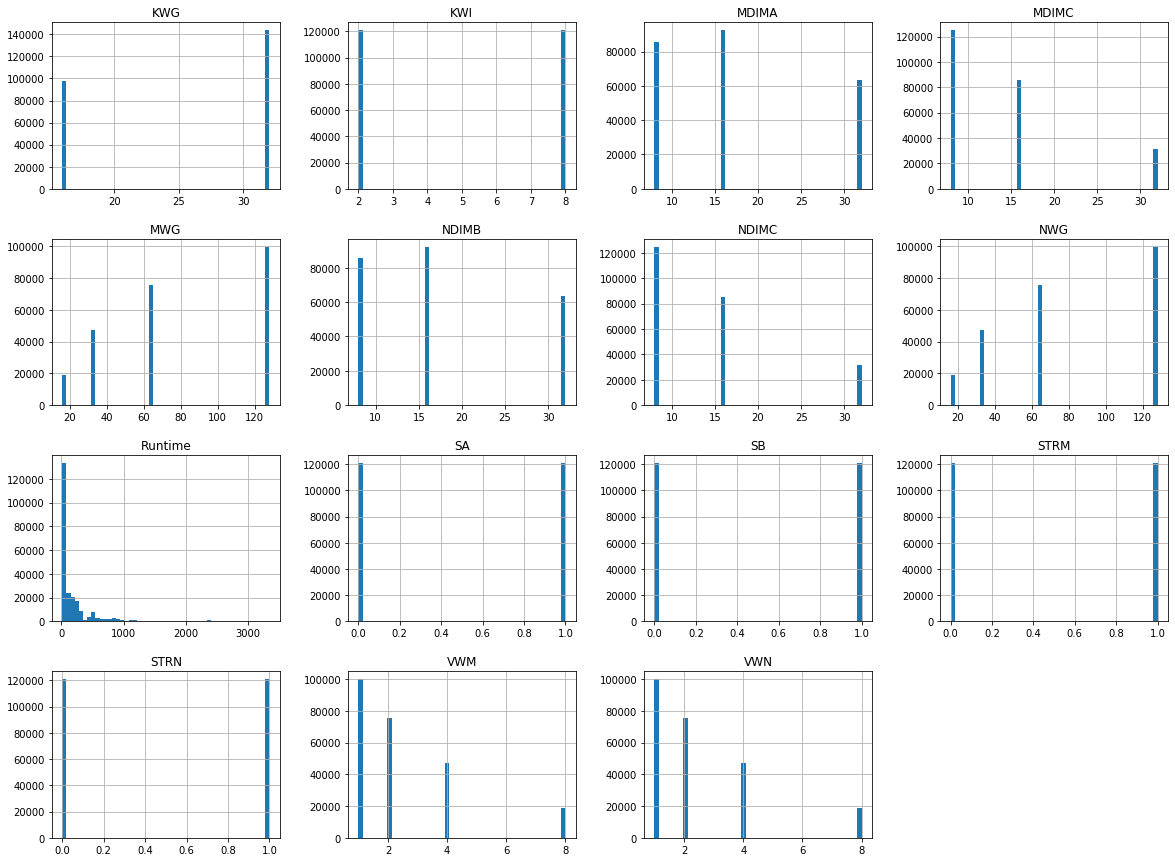

In [8]:
df1.hist(bins = 50, figsize = (20,15))
plt.show()
#creating histogram of each column

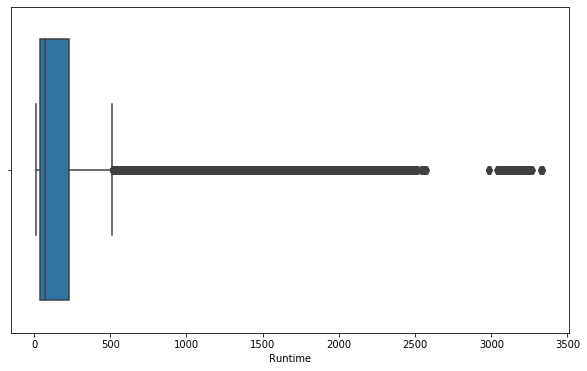

In [9]:
#checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(df1['Runtime'])
plt.show()

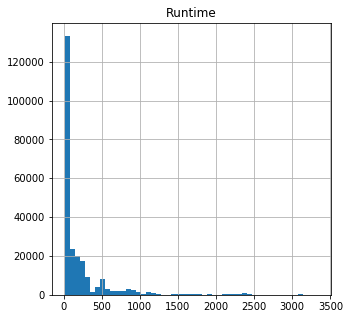

In [10]:
df1.hist(column = 'Runtime',bins = 50, figsize = (5,5))
plt.show()
#Checking Skewness

In [11]:
#removing outliers
Q1=df1['Runtime'].quantile(0.25)
Q2=df1['Runtime'].quantile(0.75)
IQR = Q2 - Q1
LL=Q1-1.5*IQR
UL=Q2+1.5*IQR
df2 = df1[(df1.Runtime>LL) & (df1.Runtime<UL)]

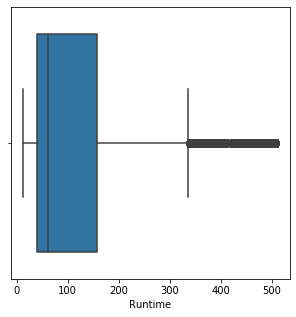

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(df2['Runtime'])
plt.show()
#after removing outliers

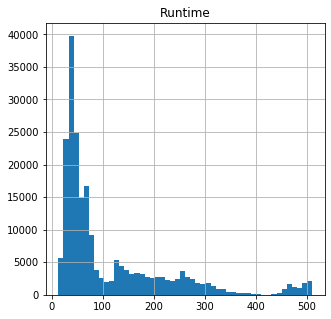

In [13]:
df2.hist(column = 'Runtime',bins = 50, figsize = (5,5))
plt.show()
#still the data seems positively skewed 

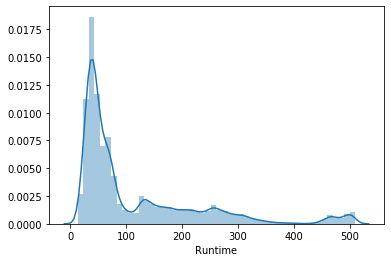

In [14]:
#plotting the distribution of Runtime
sns.distplot(df2['Runtime'])
plt.show()

E:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


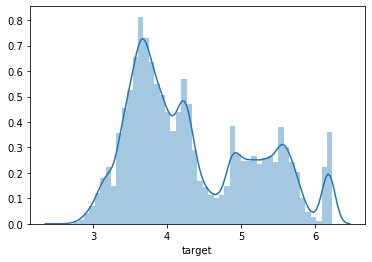

In [15]:
df2['target']=np.log(df2.Runtime)
sns.distplot(df2['target'])
plt.show()
#we scaled the target variable with log function and created a new column named 'target'
#now the data seems a bit normally distributed so we will proceed further

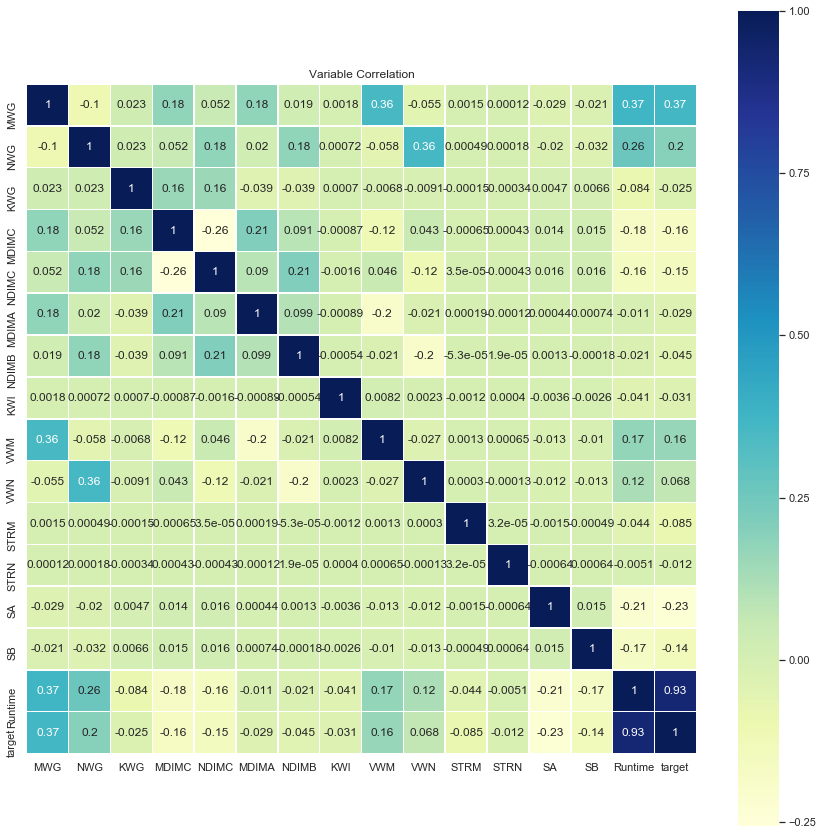

In [16]:
# Checking for correlation 
plt.figure(figsize=(15,15))
sns.set(font_scale=1)
sns.heatmap(df2.corr(),cmap='YlGnBu',annot=True, square = True ,linewidths=.5);
plt.title('Variable Correlation')
plt.show()

In [17]:
#correlation of other columns against 'target'
corr_matrix = df2.corr()
corr_matrix['target'].sort_values(ascending=False)

target     1.000000
Runtime    0.927764
MWG        0.365784
NWG        0.199119
VWM        0.161032
VWN        0.067518
STRN      -0.011999
KWG       -0.025051
MDIMA     -0.028565
KWI       -0.031009
NDIMB     -0.045229
STRM      -0.085392
SB        -0.136840
NDIMC     -0.153199
MDIMC     -0.164527
SA        -0.229189
Name: target, dtype: float64

In [18]:
# As we are considering target as our y , So we are creating a new dataframe without Runtime as it is not needed
df3 = df2.loc[:,df2.columns !='Runtime']
df3.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,target
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,4.756775
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,4.365707
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,4.389064
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,4.461733
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,4.776283


##### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X = df3.loc[:, df3.columns != 'target'] 
y = df3.loc[:,df3.columns == 'target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state = 42)
# Here we are taking a test size of 40% of the dataset 

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

In [28]:
#Function to display scores for cross validation
def display_scores(scores):
    print('Scores',scores)
    print('Mean',scores.mean())
    print('Standard Deviation',scores.std())

##### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(n_jobs = -1)

In [22]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [23]:
predictions = lin_reg.predict(X_test)

In [24]:
lin_mse = mean_squared_error(y_test,predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6512314352078719

In [30]:
lin_scores = cross_val_score(lin_reg,X_train,y_train,scoring = 'neg_mean_squared_error',cv =10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [0.65261088 0.65240304 0.64781426 0.65352609 0.6491022  0.64913986
 0.65318467 0.655247   0.65000871 0.64797296]
Mean 0.6511009653328375
Standard Deviation 0.002469996100035329


###### Scikit-Learn cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes (-) ve scores before calculating the square root.

#####  Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
predictions_tree = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test,predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0438437191153613

In [63]:
#As we can see that the DT regression is tend to overfit
scores = cross_val_score(tree_reg,X_train,y_train,scoring='neg_mean_squared_error',cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [64]:
display_scores(tree_rmse_scores)

Scores [0.04673778 0.04604586 0.0488747  0.04687166 0.04464845 0.0469026
 0.04842677 0.04802995 0.04647517 0.04946228]
Mean 0.04724752196862607
Standard Deviation 0.0013737351438299506


In [56]:
param_grid = [{
    "max_depth" : [2,3,4,5], 
    "max_leaf_nodes": [2,3,5,6],
    "min_samples_split": [2,5,10,15]
}]
grid_search_DTR = GridSearchCV(tree_reg,param_grid, cv=10,scoring = 'neg_mean_squared_error',n_jobs = -1)
grid_search_DTR.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 4, 5],
                          'max_leaf_nodes': [2, 3, 5, 6],
                          'min_samples_split'

In [57]:
grid_search_DTR.best_params_

{'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_split': 5}

In [58]:
grid_search_DTR.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=6,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [59]:
cvres = grid_search_DTR.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

0.7922739713637429 {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.7922739713637432 {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 5}
0.7922739713637431 {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 10}
0.792273971363743 {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 15}
0.7713770543748071 {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2}
0.7713770543748071 {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 5}
0.7713770543748069 {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 10}
0.771377054374807 {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 15}
0.7589523832632673 {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 2}
0.7589523832632673 {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 5}
0.7589523832632673 {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 10}
0.7589523832632673 {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 15}
0.7589523832632674 {'max

In [60]:
feature_importances =  grid_search_DTR.best_estimator_.feature_importances_
feature_importances

array([0.4689074 , 0.26250952, 0.        , 0.12030751, 0.14827557,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [61]:
sorted(zip(feature_importances, df3), reverse=True)

[(0.46890740164883715, 'MWG'),
 (0.2625095200432543, 'NWG'),
 (0.1482755702787822, 'NDIMC'),
 (0.12030750802912632, 'MDIMC'),
 (0.0, 'VWN'),
 (0.0, 'VWM'),
 (0.0, 'STRN'),
 (0.0, 'STRM'),
 (0.0, 'SB'),
 (0.0, 'SA'),
 (0.0, 'NDIMB'),
 (0.0, 'MDIMA'),
 (0.0, 'KWI'),
 (0.0, 'KWG')]

##### Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
forest_reg_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test,forest_reg_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.035561720992151644

In [33]:
forest_scores = cross_val_score(forest_reg,X_train,y_train.values.ravel(),scoring = 'neg_mean_squared_error',cv =10, n_jobs=-1)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores [0.0382999  0.03814652 0.03914474 0.03846135 0.03801077 0.03723144
 0.03718056 0.03887488 0.03676163 0.03992916]
Mean 0.038204094110487974
Standard Deviation 0.0009220100440545258


In [34]:
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid, cv=10,scoring = 'neg_mean_squared_error',n_jobs = -1)
grid_search.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [35]:
grid_search_RFR = grid_search

In [36]:
grid_search_RFR.best_params_

{'max_features': 8, 'n_estimators': 30}

In [37]:
grid_search_RFR.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
cvres = grid_search_RFR.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

0.33631509125226355 {'max_features': 2, 'n_estimators': 3}
0.24492665431985347 {'max_features': 2, 'n_estimators': 10}
0.2182942606741138 {'max_features': 2, 'n_estimators': 30}
0.173220590255252 {'max_features': 4, 'n_estimators': 3}
0.11686327688662185 {'max_features': 4, 'n_estimators': 10}
0.09456489187195635 {'max_features': 4, 'n_estimators': 30}
0.09833138307895295 {'max_features': 6, 'n_estimators': 3}
0.06933427869564632 {'max_features': 6, 'n_estimators': 10}
0.05911190473551421 {'max_features': 6, 'n_estimators': 30}
0.0692574579263653 {'max_features': 8, 'n_estimators': 3}
0.05279502853737686 {'max_features': 8, 'n_estimators': 10}
0.046857707056099214 {'max_features': 8, 'n_estimators': 30}
0.3079663748462624 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.2211183709542236 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.21016178048060125 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.14633059642273777 {'bootstrap': False, 'max_featu

In [39]:
feature_importances =  grid_search_RFR.best_estimator_.feature_importances_
feature_importances

array([0.23459613, 0.17953348, 0.02190322, 0.19327627, 0.19411714,
       0.00636184, 0.00580521, 0.00494399, 0.0371237 , 0.01993216,
       0.02410804, 0.00295018, 0.04781963, 0.02752901])

In [40]:
sorted(zip(feature_importances, df3), reverse=True)

[(0.23459613437729288, 'MWG'),
 (0.19411714195476623, 'NDIMC'),
 (0.19327627174992315, 'MDIMC'),
 (0.17953347745980117, 'NWG'),
 (0.04781962900292689, 'SA'),
 (0.03712370221992084, 'VWM'),
 (0.027529009528785838, 'SB'),
 (0.02410803963017124, 'STRM'),
 (0.02190321868490509, 'KWG'),
 (0.019932157744179734, 'VWN'),
 (0.0063618406798500605, 'MDIMA'),
 (0.0058052050771369166, 'NDIMB'),
 (0.004943988085585614, 'KWI'),
 (0.002950183804754479, 'STRN')]

##### Stochastic Gradient Descent Regressor

In [41]:
from sklearn.linear_model import SGDRegressor
SGDR = SGDRegressor(max_iter=1000, tol=1e-3)
SGDR.fit(X_train,y_train.values.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [42]:
predictions_SGD = SGDR.predict(X_test)
SGD_mse = mean_squared_error(y_test,predictions_SGD)
SGD_rmse = np.sqrt(SGD_mse)
SGD_rmse

138232999463.5757

In [43]:
SGD_scores = cross_val_score(SGDR,X_train,y_train.values.ravel(),scoring = 'neg_mean_squared_error',cv =10, n_jobs=-1)
SGD_rmse_scores = np.sqrt(-SGD_scores)
display_scores(SGD_rmse_scores)

Scores [4.86765290e+11 4.39081309e+11 4.01033858e+11 4.90483840e+11
 4.82021020e+11 1.77258411e+11 2.69275050e+11 2.01203879e+12
 3.22095295e+11 1.81358488e+11]
Mean 526141135381.54456
Standard Deviation 508340505709.3842


In [44]:
param_grid_SGD = [
    {'max_iter':[1000], 'tol':[1e-3,1e-4,1e-5,1e-6]},
]
grid_search_SGD = GridSearchCV(SGDR,param_grid_SGD, cv=10,scoring = 'neg_mean_squared_error',n_jobs = -1)
grid_search_SGD.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_iter': [1000],
                          'tol': [0.001, 0.0001, 1e-05, 1e-06]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbo

In [45]:
grid_search_SGD.best_params_

{'max_iter': 1000, 'tol': 1e-06}

In [46]:
grid_search_SGD.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=1e-06, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [47]:
cvres = grid_search_SGD.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

708914473598.1207 {'max_iter': 1000, 'tol': 0.001}
770279911704.8182 {'max_iter': 1000, 'tol': 0.0001}
815649535476.2078 {'max_iter': 1000, 'tol': 1e-05}
437088348836.1265 {'max_iter': 1000, 'tol': 1e-06}


##### Support Vector Regressor

In [48]:
from sklearn.svm import SVR
SVr = SVR(C=1.0, epsilon=0.2)
SVr.fit(X_train,y_train.values.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
predictions_SVR = SVr.predict(X_test)
SVR_mse = mean_squared_error(y_test,predictions_SVR)
SVR_rmse = np.sqrt(SVR_mse)
SVR_rmse

0.39489794101934445

In [50]:
SVR_scores = cross_val_score(SVr,X_train,y_train.values.ravel(),scoring = 'neg_mean_squared_error',cv =10, n_jobs=-1)
SVR_rmse_scores = np.sqrt(-SVR_scores)
display_scores(SVR_rmse_scores)

Scores [0.4005359  0.39305122 0.40265463 0.40006809 0.39610008 0.39706871
 0.40208646 0.40165124 0.40212151 0.40059679]
Mean 0.39959346297700604
Standard Deviation 0.002995169683622158


#### Conclusion
Linear Regression -> 0.651

Decision Tree -> 0.043 (After pruning -> 0.7233)

Random Forest -> 0.036 (After pruning -> 0.0468)

Stochastic Gradient Descent -> 1.38e+11

Support Vector Regressor -> 0.395


### After comparining all the five regression techniques following are our observations :
1: Stochastic GD is underfitting.

2: Decision Tree is overfitting on default parameters. After pruning it we had the RMSE of 0.7233 which is not the best among all the techniques used.

3: Random Forest is overfitting on all the parameters used under GRIDSEARCH CV.

4: Linear Regression is giving RMSE of 0.651 which is not the best but fairly good.

5: SVR is the best technique used in this dataset, it gives us RMSE of 0.395